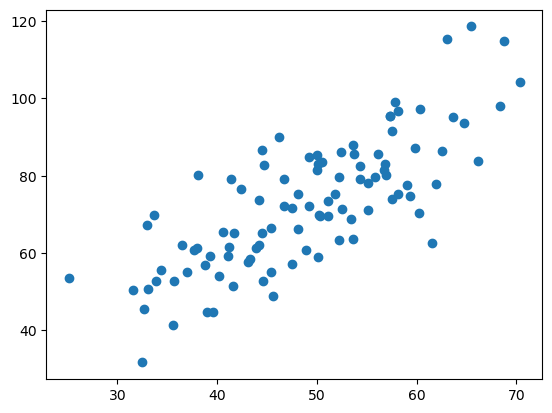

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from math import pow
import random
## 1. 导入数据data.csv
points = np.genfromtxt('data.csv',delimiter=',')
 
## points 二维数组
##[[ 32.50234527,  31.70700585],
##[ 53.42680403,  68.77759598]]
 
## 提取points 中的两列数据，分别作为x,y 
x=points[:,0]##第一列 
y=points[:,1]##第二列
 
## 用plt画出散点图 
 
plt.scatter(x,y)
plt.show()

w is : 1.4527219721615916
b is : 0.02940027986570507
cost is  114.35904528169877


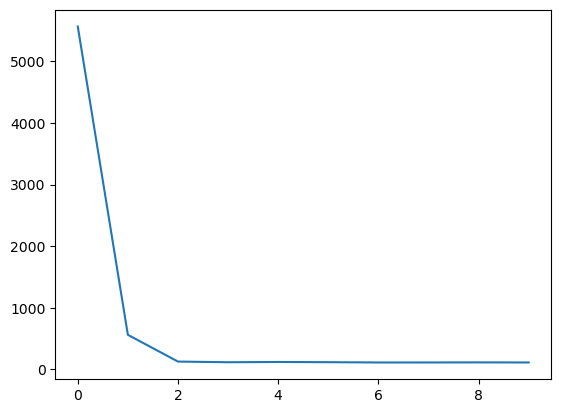

In [7]:
### 2.定义损失函数
#损失函数是系数的函数，另外还要传入数据的x,y 
def compute_cost(w,b,points):
    total_cost = 0 
    M = len(points)
    
    # 逐点计算平方损失误差，然后求平均数
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        total_cost+= (y - w*x - b)**2
        
    return total_cost/M
 
## 3.定义模型的超参数
 
alpha=0.0001
initial_w = 0  #初始值
initial_b = 0 
num_iter = 10  #迭代次数
 
## 4.定义核心梯度下降算法函数
 
def grad_desc(points,initial_w,initial_b,alpha,num_iter):
    w = initial_w
    b = initial_b 
    # 定义一个list保存所有的损失函数值，用来显示下降的过程 
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w ,b = step_grad_desc(w,b,alpha,points) ##每一步的梯度下降
    
    return [w,b,cost_list]
 

    
def step_grad_desc(current_w, current_b, alpha, points, batch_size=32):
    M = len(points)
   
    # Shuffle the data points
    np.random.shuffle(points)
    # Iterate over mini-batches
    for i in range(0, M, batch_size):
        x_batch = points[i:i+batch_size, 0]
        y_batch = points[i:i+batch_size, 1]
        grad_w = np.mean((current_w * x_batch + current_b - y_batch) * x_batch)
        grad_b = np.mean(current_w * x_batch + current_b - y_batch)
        current_w -= alpha * grad_w
        current_b -= alpha * grad_b
    return current_w, current_b

## 5.测试：运行梯度下架算法计算最优的W 和 b
 
w,b,cost_list =grad_desc(points,initial_w,initial_b,alpha,num_iter)
 
print("w is :",w)
print("b is :",b)
 
cost = compute_cost(w,b,points)
print("cost is ",cost)
plt.plot(cost_list) # 不指定x,y的话，默认下标为x轴，值为y轴
plt.show()

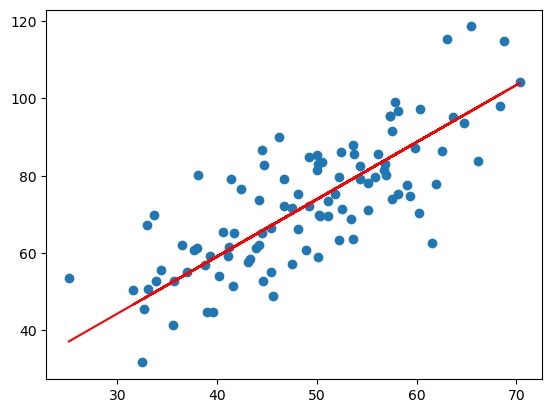

In [3]:
## 6. 画出拟合曲线
plt.scatter(x,y) ##散点图
# 针对每一个x,计算出预测的y值
pred_y = w * x + b
 
plt.plot(x,pred_y,c='r') ##点图
plt.show()